In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/Old data/'
AMS_paths = ['220505_ramp_carene_258K/', '220518_ramp_apinene_258K/', '220608_ramp_apinene_293K/']

AMS = {}
for AMS_path in AMS_paths:
    df = import_data(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    for key in df.keys():            
        if 'PToF' not in key:
            if 'old' in key:
                df[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 
                                   'f44', 'f43', 'Ratio_H_C', 'Ratio_O_C', 'Time']
            else:
                df[key].columns = ['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 
                                   'Ratio_H_C', 'Ratio_O_C', 'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH', 'f43', 'f44', 'Time']
            AMS[key] = df[key]

print(AMS['220505_AMS'].keys())
print(AMS['220505_AMS_old'].keys())
print(AMS.keys())

Index(['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'Ratio_H_C',
       'Ratio_O_C', 'familyCHN', 'familyCHO1', 'familyCHO1N', 'familyCH',
       'f43', 'f44', 'Time'],
      dtype='object')
Index(['t_series', 'HROrg', 'HRNO3', 'HRSO4', 'HRNH4', 'HRChl', 'f44', 'f43',
       'Ratio_H_C', 'Ratio_O_C', 'Time'],
      dtype='object')
dict_keys(['220505_AMS', '220505_AMS_old', '220518_AMS', '220518_AMS_old', '220608_AMS', '220608_AMS_old'])


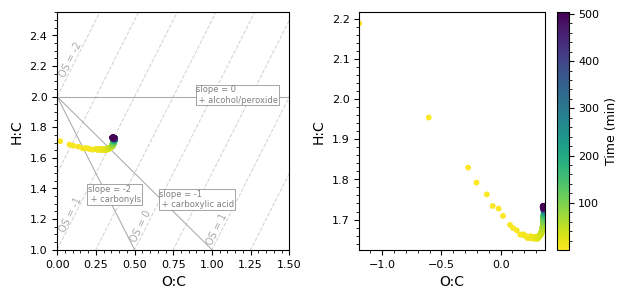

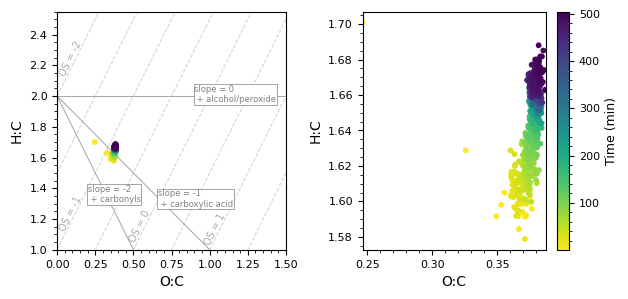

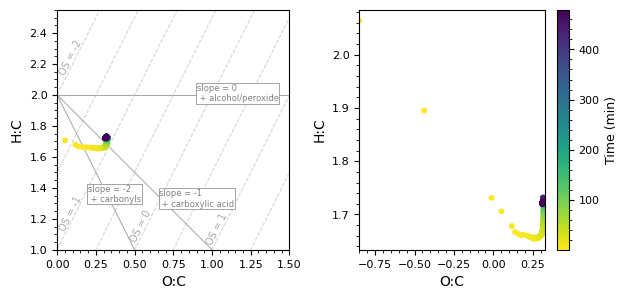

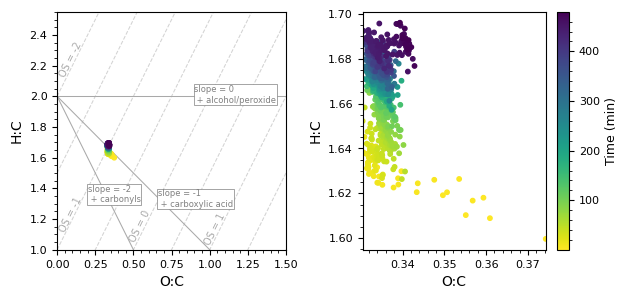

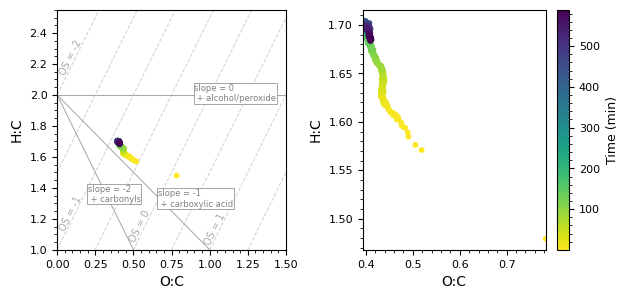

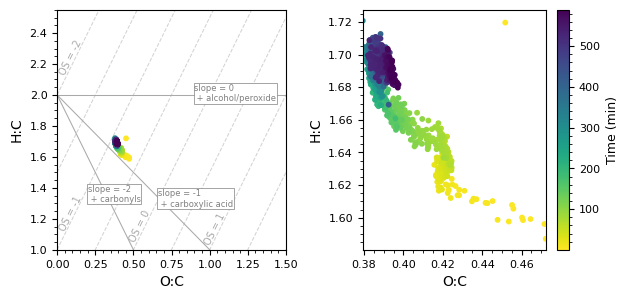

In [3]:
timestamps = [['2022-05-05 14:52', '2022-05-06 12:56'],
              ['2022-05-05 14:52', '2022-05-06 12:56'],
              ['2022-05-18 14:39', '2022-05-19 11:44'],
              ['2022-05-18 14:39', '2022-05-19 11:44'],
              ['2022-06-08 10:23', '2022-06-09 12:57'],
              ['2022-06-08 10:23', '2022-06-09 12:57']]

for key, time in zip(AMS.keys(), timestamps):
    fig, ax = vanKrevelen_ts(AMS[key], ['Ratio_H_C', 'Ratio_O_C', 'HROrg'], time, 0.5)
    fig.tight_layout(pad = 0.75)
    fig.savefig(f'vanKrevelen_{key}.jpg', dpi = 600)

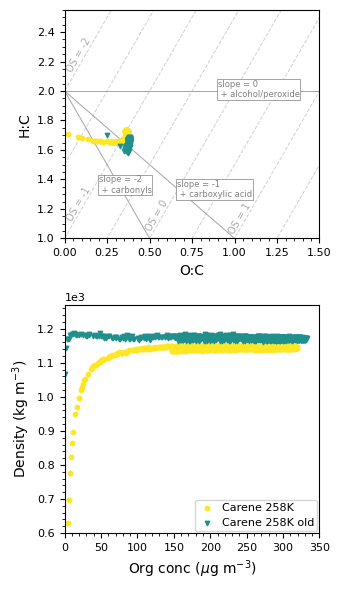

In [4]:
timestamps = [['2022-05-05 14:52', '2022-05-06 12:56'],
              ['2022-05-05 14:52', '2022-05-06 12:56']]

fig, ax = plt.subplots(2, 1, figsize = (3.5, 6))
vanKrevelen_multi_exp(ax, AMS, ['220505_AMS', '220505_AMS_old'], ['Ratio_H_C', 'Ratio_O_C', 'HROrg'], timestamps, 
                      ['Carene 258K', 'Carene 258K old'])
ax[1].set(xlim = (0, 350), ylim = (0.6*10**3, 1.27*10**3))

fig.tight_layout()
fig.savefig('vanKrevelen_carene.jpg', dpi = 600)

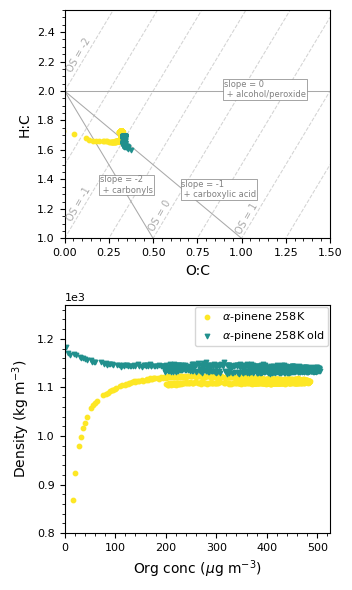

In [5]:
timestamps = [['2022-05-18 14:39', '2022-05-19 11:44'],
              ['2022-05-18 14:39', '2022-05-19 11:44']]

fig, ax = plt.subplots(2, 1, figsize = (3.5, 6))
vanKrevelen_multi_exp(ax, AMS, ['220518_AMS', '220518_AMS_old'], ['Ratio_H_C', 'Ratio_O_C', 'HROrg'], timestamps, 
                      [r'$\alpha$-pinene 258K', r'$\alpha$-pinene 258K old'])
ax[1].set(xlim = (0, 525), ylim = (0.8*10**3, 1.27*10**3))

fig.tight_layout()
fig.savefig('vanKrevelen_apinene_258K.jpg', dpi = 600)

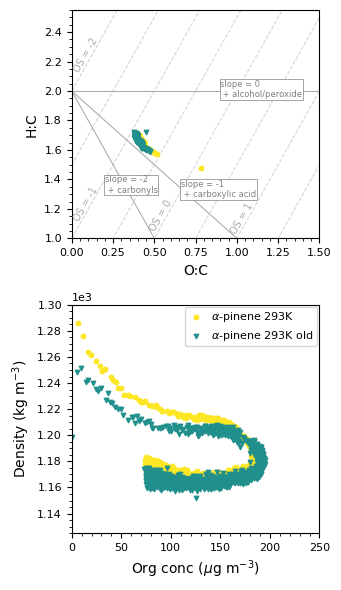

In [6]:
timestamps = [['2022-06-08 10:23', '2022-06-09 12:57'],
              ['2022-06-08 10:23', '2022-06-09 12:57']]

fig, ax = plt.subplots(2, 1, figsize = (3.5, 6))
vanKrevelen_multi_exp(ax, AMS, ['220608_AMS', '220608_AMS_old'], ['Ratio_H_C', 'Ratio_O_C', 'HROrg'], timestamps, 
                      [r'$\alpha$-pinene 293K', r'$\alpha$-pinene 293K old'])
ax[1].set(xlim = (0, 250), ylim = (1.125*10**3, 1.3*10**3))

fig.tight_layout()
fig.savefig('vanKrevelen_apinene_293K.jpg', dpi = 600)